In this notebook we are going to use classic dataset Iris from sklearn :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
#loading dataset
iris_dataset = datasets.load_iris()

## Step 1. Preparing dataset

In [3]:
#The dataset is stored as a dict, we are inspecting datset with this
iris_dataset.keys()

dict_keys(['target_names', 'DESCR', 'target', 'data', 'feature_names'])

In [4]:
#Getting data from iris dataset
data = iris_dataset['data']
classes = iris_dataset['target']

In [5]:
print(data[:10])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [6]:
print(classes[:10])
print(np.unique(classes), "<-- Classes in our dataset")

[0 0 0 0 0 0 0 0 0 0]
[0 1 2] <-- Classes in our dataset


In [7]:
print('In this dataset we have: {} classes.'.format(np.max(classes) + 1))

In this dataset we have: 3 classes.


In [8]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


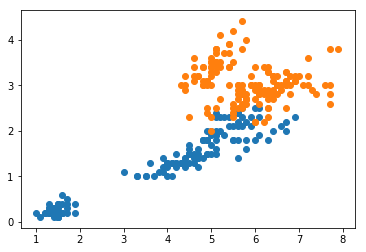

In [11]:
plt.scatter(data[:, 2], data[:, 3])
plt.scatter(data[:, 0], data[:, 1])
plt.show()

As we can see data is not on the same scale. We need to scale data into the same scale and we are going to do that with StandardScaler from sklearn

### 1.1 Scaling data

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### 1.2 Splitting data into training and testing sets

Next step in our preprocessing phase is to split data into Training and testing portion. We are doing this so we can test our classifier if it is generalized well on unseen data.

In [15]:
from sklearn.cross_validation import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, classes, test_size=0.3)

In [19]:
print("X_train has shape: {}".format(X_train.shape))
print("X_test has shape: {}".format(X_test.shape))
print("y_train has shape: {}".format(y_train.shape))
print("y_test has shape: {}".format(y_test.shape))

X_train has shape: (105, 4)
X_test has shape: (45, 4)
y_train has shape: (105,)
y_test has shape: (45,)


## Step 2. Predicting 

In [20]:
from sklearn.linear_model import LogisticRegression

In [77]:
classifer = LogisticRegression(C=1.0, max_iter=1000, solver='newton-cg')

In [78]:
classifer.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
pred = classifer.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
print(accuracy_score(y_test, pred))

0.933333333333


## Step 3. Finding best parameters with GridSearch

In [82]:
from sklearn.grid_search import GridSearchCV

In [90]:
param_grid = {'C':[10, 100, 1000], 'max_iter':[100, 1000, 10000]}

In [114]:
grid = GridSearchCV(classifer, param_grid=param_grid, verbose=10, cv=5)

In [115]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=10, max_iter=100 ..............................................
[CV] ..................... C=10, max_iter=100, score=0.954545 -   0.0s
[CV] C=10, max_iter=100 ..............................................
[CV] ..................... C=10, max_iter=100, score=1.000000 -   0.0s
[CV] C=10, max_iter=100 ..............................................
[CV] ..................... C=10, max_iter=100, score=1.000000 -   0.0s
[CV] C=10, max_iter=100 ..............................................
[CV] ..................... C=10, max_iter=100, score=0.850000 -   0.0s
[CV] C=10, max_iter=100 ..............................................
[CV] ..................... C=10, max_iter=100, score=0.950000 -   0.0s
[CV] C=10, max_iter=1000 .............................................
[CV] .................... C=10, max_iter=1000, score=0.954545 -   0.0s
[CV] C=10, max_iter=1000 .............................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.1s


[CV] .................. C=100, max_iter=10000, score=1.000000 -   0.0s
[CV] C=100, max_iter=10000 ...........................................
[CV] .................. C=100, max_iter=10000, score=0.900000 -   0.0s
[CV] C=100, max_iter=10000 ...........................................
[CV] .................. C=100, max_iter=10000, score=0.950000 -   0.0s
[CV] C=1000, max_iter=100 ............................................
[CV] ................... C=1000, max_iter=100, score=1.000000 -   0.0s
[CV] C=1000, max_iter=100 ............................................
[CV] ................... C=1000, max_iter=100, score=1.000000 -   0.0s
[CV] C=1000, max_iter=100 ............................................
[CV] ................... C=1000, max_iter=100, score=0.952381 -   0.0s
[CV] C=1000, max_iter=100 ............................................
[CV] ................... C=1000, max_iter=100, score=0.900000 -   0.0s
[CV] C=1000, max_iter=100 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [10, 100, 1000], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [116]:
print(grid.best_estimator_)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)


## Step 4. Changing hyperparams

In [118]:
classifer = LogisticRegression(C=1000.0, max_iter=100, solver='newton-cg')

In [119]:
classifer.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [120]:
pred = classifer.predict(X_test)

In [121]:
print("Accuracy on test after change: {}%".format(accuracy_score(y_test, pred)*100))

Accuracy on test after change: 97.77777777777777%
